# 1) Importing the packages and libraries

let's start off by importing the necessary libraries for data analysis and visualisation

In [10]:
import numpy as np 
import pandas as pd
import re
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2) Reading and exploring the data

let's read the training and testing datasets from the provided CSV files and use the .head() and .info() methods to take a glimpse at our data...

In [13]:
train_df = pd.read_csv('C:\\Users\\daggu\\Downloads\\train_data.csv')

test_df = pd.read_csv('C:\\Users\\daggu\\Downloads\\test_data.csv') 

In [14]:
train_df.head()

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,0,1,0,1,0.2750,0.014151,0,0,1,0.1,1,0,0,0,0,0,1
1,1,2,1,0,0.4750,0.139136,1,0,0,0.1,1,0,0,0,1,0,0
2,2,3,1,0,0.3250,0.015469,0,0,1,0.0,0,0,0,1,0,0,1
3,3,4,1,0,0.4375,0.103644,1,0,0,0.1,1,0,0,0,0,0,1
4,4,5,0,1,0.4375,0.015713,0,0,1,0.0,1,0,0,0,0,0,1


In [15]:
test_df.head()

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
0,791,792,0,1,0.2000,0.050749,0,1,0,0.0,1,0,0,0,0,0,1
1,792,793,0,0,0.3500,0.135753,0,0,1,1.0,0,0,0,1,0,0,1
2,793,794,0,1,0.3500,0.059914,1,0,0,0.0,1,0,0,0,1,0,0
3,794,795,0,1,0.3125,0.015412,0,0,1,0.0,1,0,0,0,0,0,1
4,795,796,0,1,0.4875,0.025374,0,1,0,0.0,1,0,0,0,0,0,1


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   792 non-null    int64  
 1   PassengerId  792 non-null    int64  
 2   Survived     792 non-null    int64  
 3   Sex          792 non-null    int64  
 4   Age          792 non-null    float64
 5   Fare         792 non-null    float64
 6   Pclass_1     792 non-null    int64  
 7   Pclass_2     792 non-null    int64  
 8   Pclass_3     792 non-null    int64  
 9   Family_size  792 non-null    float64
 10  Title_1      792 non-null    int64  
 11  Title_2      792 non-null    int64  
 12  Title_3      792 non-null    int64  
 13  Title_4      792 non-null    int64  
 14  Emb_1        792 non-null    int64  
 15  Emb_2        792 non-null    int64  
 16  Emb_3        792 non-null    int64  
dtypes: float64(3), int64(14)
memory usage: 105.3 KB


From above, we can see that we have 792 rows or samples and 17 columns of types int64 , object and float64 to work with



# 3) Data analysis :

In [16]:
#printing out a list of all the columns in our training dataset
train_df.columns

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Sex', 'Age', 'Fare',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Family_size', 'Title_1', 'Title_2',
       'Title_3', 'Title_4', 'Emb_1', 'Emb_2', 'Emb_3'],
      dtype='object')

In [17]:
#printing summary statistics
train_df.describe()

,Unnamed: 0,PassengerId,Survived,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Family_size,Title_1,Title_2,Title_3,Title_4,Emb_1,Emb_2,Emb_3
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,395.500000,396.500000,0.386364,0.647727,0.368244,0.064677,0.243687,0.208333,0.547980,0.088636,0.744949,0.005051,0.040404,0.209596,0.185606,0.092172,0.720960
std,228.774999,228.774999,0.487223,0.477980,0.162994,0.100987,0.429577,0.406373,0.498007,0.154485,0.436165,0.070932,0.197029,0.407277,0.389034,0.289451,0.448811
min,0.000000,1.000000,0.000000,0.000000,0.008375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,197.750000,198.750000,0.000000,0.000000,0.275000,0.015469,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,395.500000,396.500000,0.000000,1.000000,0.350000,0.028302,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,593.250000,594.250000,1.000000,1.000000,0.437500,0.061045,0.000000,0.000000,1.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,791.000000,792.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
#Finding the percantage of missing values in train dataset
train_df.isnull().sum()/ len(train_df) *100

Unnamed: 0     0.0
PassengerId    0.0
Survived       0.0
Sex            0.0
Age            0.0
Fare           0.0
Pclass_1       0.0
Pclass_2       0.0
Pclass_3       0.0
Family_size    0.0
Title_1        0.0
Title_2        0.0
Title_3        0.0
Title_4        0.0
Emb_1          0.0
Emb_2          0.0
Emb_3          0.0
dtype: float64

In [20]:
#Finding the percentage of Null values in test dataset
test_df.isnull().sum()/ len(test_df) *100

Unnamed: 0     0.0
PassengerId    0.0
Survived       0.0
Sex            0.0
Age            0.0
Fare           0.0
Pclass_1       0.0
Pclass_2       0.0
Pclass_3       0.0
Family_size    0.0
Title_1        0.0
Title_2        0.0
Title_3        0.0
Title_4        0.0
Emb_1          0.0
Emb_2          0.0
Emb_3          0.0
dtype: float64

# 4) Visual Data Analysis

,Sex,Survived
0,0,0.749104
1,1,0.189084


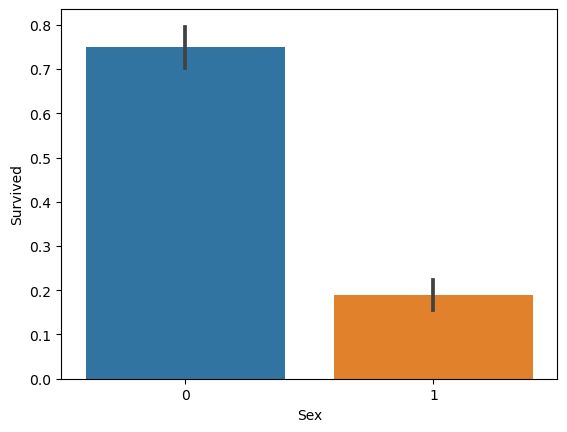

In [24]:
sns.barplot(x='Sex',y='Survived',data=train_df)
train_df.groupby('Sex',as_index=False).Survived.mean()

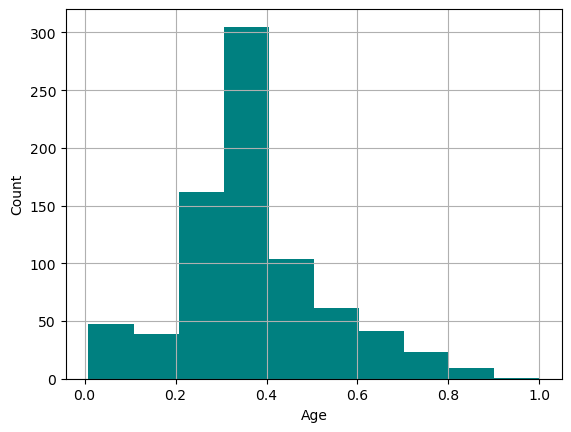

The Median age of passengers is : 0
The Standard Deviation age of passengers is : 0


In [30]:
train_df.Age.hist(bins=10,color='teal')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
print("The Median age of passengers is :", int(train_df.Age.median()))
print("The Standard Deviation age of passengers is :", int(train_df.Age.std()))

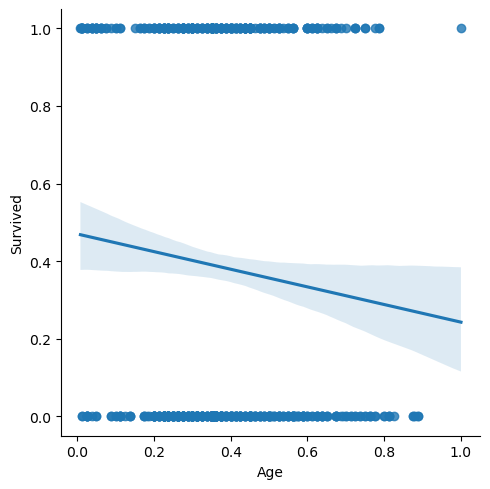

In [31]:
sns.lmplot(x='Age',y='Survived',data=train_df,palette='Set1')